In [1]:
import numpy as np
import pandas as pd
# import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [2]:
# Global variables
RANDOM_STATE = 0

## Import

In [3]:
#import statsmodels.api as sm
#from statsmodels.formula.api import ols

#def anova_test(x, data=data_train):
#    mod = ols('Fraudulent_Claim ~ {}'.format(x), data=data).fit()
#    aov_table = sm.stats.anova_lm(mod, tpy=2)
#    print(aov_table)

In [4]:
#anova_test('State_Code')

In [5]:
dtype = {
 'Annual_Premium': 'int64',
 'Claim_Amount': 'float64',
 'Claim_Cause': 'category',
 'Claim_Date': 'category',
 'Claim_Report_Type': 'category',
 'Claimant__Number': 'int64',
 'Education': 'category',
 'Employment_Status': 'category',
 'Fraudulent_Claim': 'category',
 'Gender': 'category',
 'Income': 'int64',
 'Location': 'category',
 'Marital_Status': 'category',
 'Monthly_Premium': 'int64',
 'Months_Since_Last_Claim': 'int64',
 'Months_Since_Policy_Inception': 'int64',
 'Outstanding_Balance': 'float64',
 'State': 'category',
 'State_Code': 'category',
 'Vehicle_Class': 'category',
 'Vehicle_Model': 'category',
 'Vehicle_Size': 'category'}
    
df0 = pd.read_csv('claim_data_v2_train.csv', dtype=dtype, usecols=[*dtype])

In [6]:
df0.head()

,State_Code,State,Claim_Amount,Education,Claim_Date,Employment_Status,Gender,Income,Location,Marital_Status,...,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Vehicle_Model,Outstanding_Balance,Fraudulent_Claim,Claimant__Number
0,KS,Kansas,575.560000,Bachelor,12/01/2018,Employed,F,56274,Suburban,Married,...,32,5,Collision,Agent,Two-Door Car,Midsize,Toyota,25781.0,N,1001
1,NE,Nebraska,697.953590,Bachelor,12/01/2018,Unemployed,F,0,NaN,Single,...,13,42,Scratch/Dent,Agent,Four-Door Car,Midsize,Chevrolet,37061.0,N,1002
2,OK,Oklahoma,1288.743165,Bachelor,12/01/2018,Employed,F,48767,Suburban,Married,...,18,38,Collision,Agent,Two-Door Car,Midsize,Chevrolet,17236.0,N,1003
3,MO,Missouri,764.586183,Bachelor,12/01/2018,Unemployed,M,0,Suburban,Married,...,18,65,Collision,Call Center,SUV,Midsize,Honda,30270.0,N,1004
4,KS,Kansas,281.369258,Bachelor,12/01/2018,Employed,M,43836,Rural,Single,...,52,44,Collision,Agent,Four-Door Car,Midsize,Ford,16263.0,N,1005


In [7]:
df0.columns

Index(['State_Code', 'State', 'Claim_Amount', 'Education', 'Claim_Date',
       'Employment_Status', 'Gender', 'Income', 'Location', 'Marital_Status',
       'Monthly_Premium', 'Annual_Premium', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Claim_Cause', 'Claim_Report_Type',
       'Vehicle_Class', 'Vehicle_Size', 'Vehicle_Model', 'Outstanding_Balance',
       'Fraudulent_Claim', 'Claimant__Number'],
      dtype='object')

## Test Train Split

In [8]:
from sklearn.model_selection import train_test_split 

num_test = 0.20 

data_train0, data_test0 = train_test_split(df0, test_size=num_test, random_state=RANDOM_STATE)

In [9]:
data_train0.shape

(4000, 22)

In [10]:
data_test0.shape

(1001, 22)

In [11]:
data_train0.to_csv("data_train0.csv")
data_test0.to_csv("data_test0.csv")

## Tranformations and Encoding

In [12]:
def encode_target(df):
    # Convert Fraud Claim data from Y/N to 1/0
    df['Fraudulent_Claim'] = df['Fraudulent_Claim'].replace(('Y', 'N'), (1, 0))
    return df

In [13]:
def encode_gender(df):
    # Convert Gender data from M/F to 1/0
    df['Gender'] = df['Gender'].replace(('M', 'F'), (1, 0))
    return df

In [14]:
def simplify_employee(df):
    # Fill missing values with mode
    df['Employment_Status'] = df['Employment_Status'].fillna('Employed')
    
    # Encode as numeric representing years of schooling
    encode = {'Employed': 'Employed',
              'Unemployed': 'Unemployed',
              'Disabled': 'Employed',
              'Medical Leave': 'Medical Leave',
              'Retired': 'Retired'}
    
    df['Employment_Status'] = df['Employment_Status'].map(encode)
    return df

In [15]:
def encode_marital(df):
    # Convert Marital_Status data from Single/Married/Divorced to 0/1/2
    df['Marital_Status'] = df['Marital_Status'].replace(('Married', 'Single', 'Divorced'), (1, 0, 2))
    return df

In [16]:
def encode_vsize(df):
    # Convert Vehicle Size from Compact, Midsize, and Luxury to 1, 2, and 3
    df['Vehicle_Size'] = df['Vehicle_Size'].replace(('Compact', 'Midsize', 'Luxury'), (1,2,3))
    return df

In [17]:
def simplify_claim_amount(df):
    # Apply a log transformation to claim amount
    df['Claim_Amount'] = df['Claim_Amount'].apply(np.log)
    return df

In [18]:
def simplify_income(df):
    # Simplify income into bins
    bins = (-1, 10000, 50000, 90000, 999999999) 
    group_names = [0, 1, 2, 3] 
    categories = pd.cut(df['Income'], bins, labels=group_names) 
    df['Income'] = categories.astype('int8')
    return df

In [19]:
def simplify_location(df):
    # Fill missing values with mode
    df['Location'] = df['Location'].fillna('Suburban')
    return df

In [20]:
def simplify_outstanding_balance(df):
    # Fill missing values with 0 meaning there is no outstanding balance
    df['Outstanding_Balance'] = df['Outstanding_Balance'].fillna(0)
    return df

In [21]:
def simplify_education(df):
    # Fill missing values with mode
    df['Education'] = df['Education'].fillna('College')
    
    # Encode as numeric representing years of schooling
    encode = {'High School or Below': 'High School or Below',
              'College': 'College',
              'Bachelor': 'Bachelor',
              'Master': 'Graduate',
              'Doctor': 'Graduate'}

    df['Education'] = df['Education'].map(encode)
    return df

In [22]:
def simplify_claim_cause(df):

    # Encode as numeric representing years of schooling
    encode = {'Collision': 'Collision',
              'Hail': 'Hail',
              'Scratch/Dent': 'Scratch/Dent',
              'Other': 'Other',
              'Fire': 'Fire'}

    df['Claim_Cause'] = df['Claim_Cause'].map(encode)
    return df

In [23]:
def drop_features(df):
    features = ['State', 'Annual_Premium', 'Vehicle_Model']
    df = df.drop(features, axis='columns')
    return df

In [24]:
def transform_features(df):
    df = encode_target(df)
    df = encode_gender(df)
    df = simplify_employee(df)
    df = encode_marital(df)
    df = encode_vsize(df)
    df = simplify_claim_amount(df)
    df = simplify_income(df)
    df = simplify_location(df)
    df = simplify_outstanding_balance(df)
    df = simplify_education(df)
    df = simplify_claim_cause(df)
    df = drop_features(df)
    return df

In [26]:
data_train = transform_features(data_train0.copy(deep=True))

In [27]:
data_test = transform_features(data_test0.copy(deep=True))

In [28]:
data_train.isna().sum()

State_Code                       0
Claim_Amount                     0
Education                        0
Claim_Date                       0
Employment_Status                0
Gender                           0
Income                           0
Location                         0
Marital_Status                   0
Monthly_Premium                  0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Claim_Cause                      0
Claim_Report_Type                0
Vehicle_Class                    0
Vehicle_Size                     0
Outstanding_Balance              0
Fraudulent_Claim                 0
Claimant__Number                 0
dtype: int64

In [29]:
data_train.head()

,State_Code,Claim_Amount,Education,Claim_Date,Employment_Status,Gender,Income,Location,Marital_Status,Monthly_Premium,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Outstanding_Balance,Fraudulent_Claim,Claimant__Number
2715,MO,6.506815,Graduate,12/15/2018,Employed,0,2,Rural,1,58,18,79,Hail,Call Center,Four-Door Car,2,30634.0,0,3716
788,IA,5.446624,College,12/01/2018,Unemployed,0,0,Suburban,0,104,31,53,Scratch/Dent,Branch,Four-Door Car,2,10658.0,0,1789
1457,MO,6.200470,High School or Below,12/01/2018,Unemployed,0,0,Suburban,0,91,25,21,Other,Call Center,Four-Door Car,2,41743.0,0,2458
3568,IA,6.046150,Bachelor,12/15/2018,Unemployed,1,0,Suburban,0,80,9,88,Collision,Call Center,Four-Door Car,2,46886.0,0,4569
3529,IA,6.571308,High School or Below,12/15/2018,Employed,1,2,Suburban,1,69,9,81,Other,Agent,Four-Door Car,3,45168.0,0,4530


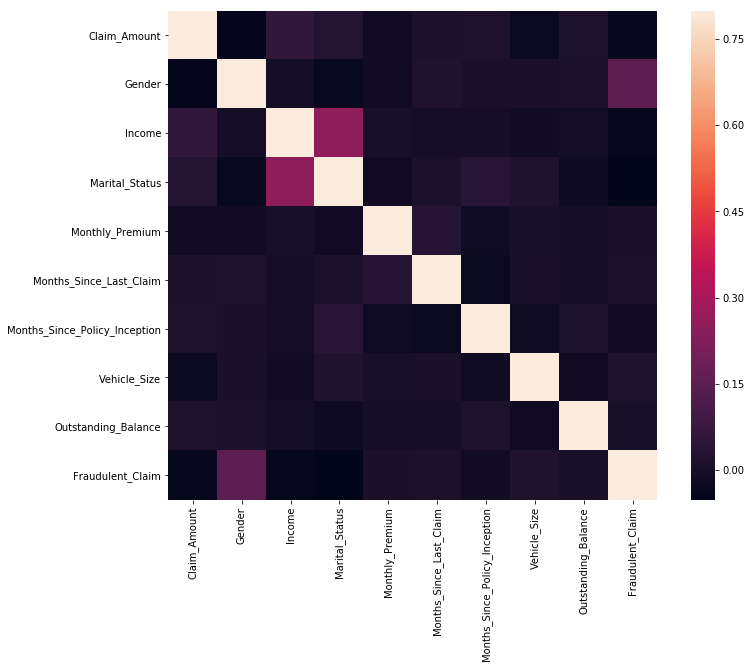

In [29]:
corrmat= data_train.drop('Claimant__Number', axis='columns').corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

## Encoding

In [30]:
def one_hot_encode(columns, train, test):
    df_train = pd.get_dummies(train, columns=columns, prefix=columns)
    print("Train Original Shape:", df_train.shape)
    df_test = pd.get_dummies(test, columns=columns, prefix=columns)
    print("Test Original Shape:", df_test.shape)
    final_train, final_test = df_train.align(df_test, join='inner', axis=1)  # inner join - return only columns that are the same
    return final_train, final_test

In [31]:
# Chose the columns to one hot encode
columns = ['Vehicle_Class', 'Employment_Status', 'Education', 'State_Code', 'Claim_Date', 'Location', 'Claim_Cause', 'Claim_Report_Type']

In [32]:
train_encoded, test_encoded = one_hot_encode(columns, data_train, data_test)

Train Original Shape: (4000, 45)
Test Original Shape: (1001, 44)


In [33]:
train_encoded.shape

(4000, 44)

In [34]:
test_encoded.shape

(1001, 44)

In [35]:
train_encoded.columns

Index(['Claim_Amount', 'Gender', 'Income', 'Marital_Status', 'Monthly_Premium',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Vehicle_Size', 'Outstanding_Balance', 'Fraudulent_Claim',
       'Claimant__Number', 'Vehicle_Class_Four-Door Car',
       'Vehicle_Class_Luxury Car', 'Vehicle_Class_Luxury SUV',
       'Vehicle_Class_SUV', 'Vehicle_Class_Sports Car',
       'Vehicle_Class_Two-Door Car', 'Employment_Status_Employed',
       'Employment_Status_Medical Leave', 'Employment_Status_Retired',
       'Employment_Status_Unemployed', 'Education_Bachelor',
       'Education_College', 'Education_Graduate',
       'Education_High School or Below', 'State_Code_IA', 'State_Code_KS',
       'State_Code_MO', 'State_Code_NE', 'State_Code_OK',
       'Claim_Date_01/15/2019', 'Claim_Date_12/01/2018',
       'Claim_Date_12/15/2018', 'Location_Rural', 'Location_Suburban',
       'Location_Urban', 'Claim_Cause_Collision', 'Claim_Cause_Hail',
       'Claim_Cause_Other', 'C

In [36]:
train_encoded.dtypes

Claim_Amount                       float64
Gender                               int64
Income                                int8
Marital_Status                       int64
Monthly_Premium                      int64
Months_Since_Last_Claim              int64
Months_Since_Policy_Inception        int64
Vehicle_Size                         int64
Outstanding_Balance                float64
Fraudulent_Claim                     int64
Claimant__Number                     int64
Vehicle_Class_Four-Door Car          uint8
Vehicle_Class_Luxury Car             uint8
Vehicle_Class_Luxury SUV             uint8
Vehicle_Class_SUV                    uint8
Vehicle_Class_Sports Car             uint8
Vehicle_Class_Two-Door Car           uint8
Employment_Status_Employed           uint8
Employment_Status_Medical Leave      uint8
Employment_Status_Retired            uint8
Employment_Status_Unemployed         uint8
Education_Bachelor                   uint8
Education_College                    uint8
Education_G

In [37]:
import numpy as np
X = np.array(train_encoded.ix[:, train_encoded.columns != 'Fraudulent_Claim'])
y = np.array(train_encoded.ix[:, train_encoded.columns == 'Fraudulent_Claim'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (4000, 43)
Shape of y: (4000, 1)


c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (2800, 43)
Number transactions y_train dataset:  (2800, 1)
Number transactions X_test dataset:  (1200, 43)
Number transactions y_test dataset:  (1200, 1)


In [39]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [168]
Before OverSampling, counts of label '0': [2632] 

After OverSampling, the shape of train_X: (5264, 43)
After OverSampling, the shape of train_y: (5264,) 

After OverSampling, counts of label '1': 2632
After OverSampling, counts of label '0': 2632


## Sampling

Apply sampling to train_encoded only

In [37]:
#Finds the number of fraud samples 
no_frauds = len(train_encoded[train_encoded['Fraudulent_Claim'] == 1])

#gets indices of nonfraud samples
non_fraud_indices = train_encoded[train_encoded.Fraudulent_Claim == 0].index

#Random sample non fraud indices
random_indices = np.random.choice(non_fraud_indices, no_frauds, replace=False, )

#Find the indices of fraud samples
fraud_indices = train_encoded[train_encoded.Fraudulent_Claim == 1].index

#Concat fraud indices with sample non-fraud ones
under_sample_indices = np.concatenate([fraud_indices, random_indices])

#Get Balance Dataframe
under_sample = train_encoded.loc[under_sample_indices]

#Results
under_sample["Fraudulent_Claim"].describe()

count    490.000000
mean       0.500000
std        0.500511
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: Fraudulent_Claim, dtype: float64

## Modeling

Select dataframe to use for modeling

In [38]:
data_modeling = train_encoded.copy(deep=True)

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#### Modeling Pipeline

In [40]:
models = {}

In [41]:
def run_model(ID, clf, train, test):
    # Split X=independent variables and y=dependent variable
    X_train = train.drop(["Claimant__Number", "Fraudulent_Claim"], axis="columns")
    X_test = test.drop(["Claimant__Number", "Fraudulent_Claim"], axis="columns")
    y_train = train["Fraudulent_Claim"]
    y_test = test["Fraudulent_Claim"]
    
    # Train model
    clf.fit(X_train, y_train)
    
    # Make predictions
    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)
    
    # Get fraud prediction percent
    train_fraud_pct = np.array(train_predictions).mean()
    test_fraud_pct = np.array(test_predictions).mean()
    
    # Score predictions
    train_score = accuracy_score(y_train, train_predictions)
    test_score = accuracy_score(y_test, test_predictions)
    
    confusion_mtx = confusion_matrix(y_test, test_predictions)
    tn, fp, fn, tp = confusion_mtx.ravel()
    
    # Save model and results to dictionary
    models[ID] = {"clf": clf,
                  "test_score": test_score, 
                  "train_score": train_score,
                  "test_pred_pct_fraud": test_fraud_pct,
                  "train_pred_pct_fraud": train_fraud_pct,
                  "true negative": tn,
                  "false positive": fp,
                  "false negative": fn,
                  "true positive": tp
                 }
    
    # Pretty-Print results
    pprint(models[ID])
    print("Confusion Matrix:\n", confusion_mtx)    

#### Simple Model (Predict all are not fraud)

In [42]:
class simple_model():
    def __repr__(self):
        return "Predicts non-fraud for everyone"
    
    def fit(self, X, y):
        pass
    
    def predict(self, X, prediction=0):
        return np.array([prediction]*len(X))

In [43]:
clf = simple_model()

In [44]:
run_model("Simple Model", clf, train_encoded, test_encoded)

{'clf': Predicts non-fraud for everyone,
 'false negative': 62,
 'false positive': 0,
 'test_pred_pct_fraud': 0.0,
 'test_score': 0.938061938061938,
 'train_pred_pct_fraud': 0.0,
 'train_score': 0.93875,
 'true negative': 939,
 'true positive': 0}
Confusion Matrix:
 [[939   0]
 [ 62   0]]


### Imbalanced Data

#### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
clf = DecisionTreeClassifier(random_state=RANDOM_STATE,
                            max_depth=5
                            )

In [47]:
run_model("Decision Tree - Imbalanced Data", clf, train_encoded, test_encoded)

{'clf': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
 'false negative': 62,
 'false positive': 3,
 'test_pred_pct_fraud': 0.002997002997002997,
 'test_score': 0.935064935064935,
 'train_pred_pct_fraud': 0.0015,
 'train_score': 0.94025,
 'true negative': 936,
 'true positive': 0}
Confusion Matrix:
 [[936   3]
 [ 62   0]]


#### Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

c:\users\student\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [49]:
clf = GradientBoostingClassifier(random_state=RANDOM_STATE,
                            max_depth=12
                            )

In [50]:
run_model("Gradient Boosting - Imbalanced Data", clf, train_encoded, test_encoded)

{'clf': GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=12,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False),
 'false negative': 61,
 'false positive': 5,
 'test_pred_pct_fraud': 0.005994005994005994,
 'test_score': 0.9340659340659341,
 'train_pred_pct_fraud': 0.06125,
 'train_score': 1.0,
 'true negative': 934,
 'true positive': 1}
Confusion Matrix:
 [[934   5]
 [ 61   1]]


#### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
clf = LogisticRegression(random_state=RANDOM_STATE)

In [53]:
run_model("Logistic Regression - Imbalanced Data", clf, train_encoded, test_encoded)

{'clf': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
 'false negative': 62,
 'false positive': 0,
 'test_pred_pct_fraud': 0.0,
 'test_score': 0.938061938061938,
 'train_pred_pct_fraud': 0.0,
 'train_score': 0.93875,
 'true negative': 939,
 'true positive': 0}
Confusion Matrix:
 [[939   0]
 [ 62   0]]


#### Neural Network

In [54]:
from sklearn.neural_network import MLPClassifier

In [55]:
clf = MLPClassifier(random_state=RANDOM_STATE)

In [56]:
run_model("Neural Net - Imbalanced Data", clf, train_encoded, test_encoded)

{'clf': MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
 'false negative': 62,
 'false positive': 0,
 'test_pred_pct_fraud': 0.0,
 'test_score': 0.938061938061938,
 'train_pred_pct_fraud': 0.0,
 'train_score': 0.93875,
 'true negative': 939,
 'true positive': 0}
Confusion Matrix:
 [[939   0]
 [ 62   0]]


### Undersampled Data

#### Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
clf = DecisionTreeClassifier(random_state=RANDOM_STATE,
                            max_depth=5
                            )

In [59]:
run_model("Decision Tree - Under Sampled", clf, under_sample, test_encoded)

{'clf': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
 'false negative': 1,
 'false positive': 413,
 'test_pred_pct_fraud': 0.47352647352647353,
 'test_score': 0.5864135864135864,
 'train_pred_pct_fraud': 0.7,
 'train_score': 0.7918367346938775,
 'true negative': 526,
 'true positive': 61}
Confusion Matrix:
 [[526 413]
 [  1  61]]


#### Gradient Boosting

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
clf = GradientBoostingClassifier(random_state=RANDOM_STATE,
                            max_depth=12
                            )

In [62]:
run_model("Gradient Boosting - Under Sampled", clf, under_sample, test_encoded)

{'clf': GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=12,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False),
 'false negative': 12,
 'false positive': 303,
 'test_pred_pct_fraud': 0.35264735264735264,
 'test_score': 0.6853146853146853,
 'train_pred_pct_fraud': 0.5,
 'train_score': 1.0,
 'true negative': 636,
 'true positive': 50}
Confusion Matrix:
 [[636 303]
 [ 12  50]]


#### Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
clf = LogisticRegression(random_state=RANDOM_STATE)

In [65]:
run_model("Logistic Regression - Under Sampled", clf, under_sample, test_encoded)

{'clf': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
 'false negative': 13,
 'false positive': 310,
 'test_pred_pct_fraud': 0.35864135864135865,
 'test_score': 0.6773226773226774,
 'train_pred_pct_fraud': 0.5673469387755102,
 'train_score': 0.7979591836734694,
 'true negative': 629,
 'true positive': 49}
Confusion Matrix:
 [[629 310]
 [ 13  49]]


#### Neural Network

In [66]:
from sklearn.neural_network import MLPClassifier

In [67]:
clf = MLPClassifier(random_state=RANDOM_STATE)

In [68]:
run_model("Neural Net - Under Sampled", clf, under_sample, test_encoded)

{'clf': MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
 'false negative': 4,
 'false positive': 925,
 'test_pred_pct_fraud': 0.9820179820179821,
 'test_score': 0.07192807192807193,
 'train_pred_pct_fraud': 0.9775510204081632,
 'train_score': 0.5020408163265306,
 'true negative': 14,
 'true positive': 58}
Confusion Matrix:
 [[ 14 925]
 [  4  58]]


#### Model Selection

In [69]:
pd.DataFrame(models).transpose()

,clf,false negative,false positive,test_pred_pct_fraud,test_score,train_pred_pct_fraud,train_score,true negative,true positive
Simple Model,Predicts non-fraud for everyone,62,0,0,0.938062,0,0.93875,939,0
Decision Tree - Imbalanced Data,"DecisionTreeClassifier(class_weight=None, crit...",62,3,0.002997,0.935065,0.0015,0.94025,936,0
Gradient Boosting - Imbalanced Data,([DecisionTreeRegressor(criterion='friedman_ms...,61,5,0.00599401,0.934066,0.06125,1,934,1
Logistic Regression - Imbalanced Data,"LogisticRegression(C=1.0, class_weight=None, d...",62,0,0,0.938062,0,0.93875,939,0
Neural Net - Imbalanced Data,"MLPClassifier(activation='relu', alpha=0.0001,...",62,0,0,0.938062,0,0.93875,939,0
Decision Tree - Under Sampled,"DecisionTreeClassifier(class_weight=None, crit...",1,413,0.473526,0.586414,0.7,0.791837,526,61
Gradient Boosting - Under Sampled,([DecisionTreeRegressor(criterion='friedman_ms...,12,303,0.352647,0.685315,0.5,1,636,50
Logistic Regression - Under Sampled,"LogisticRegression(C=1.0, class_weight=None, d...",13,310,0.358641,0.677323,0.567347,0.797959,629,49
Neural Net - Under Sampled,"MLPClassifier(activation='relu', alpha=0.0001,...",4,925,0.982018,0.0719281,0.977551,0.502041,14,58
